## Objectives

### 1. Find out the avg orders and avg totalsales  per customers?
### 2.Find out the customer first and last purchase to identity the no of days the customer is with us?
### 3. Find out the Customer purchase frequency?
### 4.What is the highest and least purchases done by the customers?
### 5. No of days difference between each purchase made by customers?
### 6.Most purchased product by a customer?
### 7.Find the Top 5 customers with most orders?

### Importing Libraries

In [1]:
!pip install squarify

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option("display.max_columns",100)
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta
import squarify

#### Importing data

In [3]:
df= pd.read_csv(r"D:\Nov projects\Class Project\Retail_data.csv")

In [4]:
df.sample(5)

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity,order_name,product_type,product_title,product_vendor,variant_title,api_client_title
26763,12-09-2021 14:00,4.115040e+12,5.366650e+12,5.913260e+12,7.89,3.999610e+13,1,28.96,0.0,0.0,28.96,0.0,2.6,31.56,2,2,0,#6159,Beverages,BrookeBond Taj Mahal Tea,Taj Mahal,450 g,Point of Sale
54275,24-12-2021 12:00,4.610030e+12,5.282000e+12,0.000000e+00,1.03,0.000000e+00,1,2.06,0.0,0.0,2.06,0.0,0.0,2.06,1,1,0,#11657,NaN,Fresh Green chilli (104 g),NaN,NaN,Point of Sale
5212,12-06-2021 17:00,3.863180e+12,5.314420e+12,6.741640e+12,4.29,4.001670e+13,1,7.88,0.0,0.0,7.88,0.0,0.7,8.58,1,1,0,#2086,Oil,KTC Coconut Oil,KTC,500 ml,Point of Sale
21067,19-08-2021 18:00,4.013450e+12,5.354490e+12,6.861130e+12,2.99,4.043790e+13,1,5.48,0.0,0.0,5.48,0.0,0.5,5.98,1,1,0,#5022,Sweets & Snacks,Ambala - Banana Chips,Ambala,150 g,Point of Sale
96343,10-05-2022 01:00,4.750800e+12,6.188350e+12,6.733830e+12,4.89,4.027350e+13,1,8.98,0.0,0.0,8.98,0.0,0.8,9.78,1,1,0,#19417,Frozen foods,Haldiram's Mutter Kachori (Frozen),Haldiram's,420 g,Online Store


In [5]:
df.shape

(101929, 23)

In [6]:
df.orders.value_counts()

1    95296
0     6633
Name: orders, dtype: int64

In [7]:
df.isnull().sum()

hour                          0
order_id                      0
customer_id                   0
product_id                    0
product_price                 0
variant_id                    0
orders                        0
gross_sales                   0
discounts                     0
returns                       0
net_sales                     0
shipping                      0
taxes                         0
total_sales                   0
ordered_item_quantity         0
net_quantity                  0
returned_item_quantity        0
order_name                 5961
product_type              22861
product_title              6483
product_vendor            22366
variant_title             31316
api_client_title           5961
dtype: int64

In [8]:
for col in list(df):
    print(f"{col} ---->{df[col].nunique()}")

hour ---->8855
order_id ---->10767
customer_id ---->1038
product_id ---->803
product_price ---->1177
variant_id ---->699
orders ---->2
gross_sales ---->1376
discounts ---->395
returns ---->138
net_sales ---->1506
shipping ---->6
taxes ---->375
total_sales ---->1577
ordered_item_quantity ---->18
net_quantity ---->23
returned_item_quantity ---->6
order_name ---->19374
product_type ---->16
product_title ---->8074
product_vendor ---->174
variant_title ---->188
api_client_title ---->4


### Dropping null values

In [9]:
df1= df.dropna()

In [10]:
df1.shape

(70337, 23)

In [11]:
for col in list(df1):
    print(f"{col}---> {df1[col].nunique()}")

hour---> 2863
order_id---> 10149
customer_id---> 1025
product_id---> 772
product_price---> 294
variant_id---> 654
orders---> 2
gross_sales---> 917
discounts---> 384
returns---> 120
net_sales---> 1166
shipping---> 1
taxes---> 312
total_sales---> 1195
ordered_item_quantity---> 18
net_quantity---> 23
returned_item_quantity---> 6
order_name---> 17556
product_type---> 16
product_title---> 1508
product_vendor---> 168
variant_title---> 188
api_client_title---> 4


In [12]:
df1.product_type.unique()

array(['Masalas & Spices', 'Others', 'Rice & Rice products',
       'Sweets & Snacks', 'Ready to Cook & Eat', 'Organic', 'Beverages',
       'Pickles, Pastes & Papad', 'Flour & Atta',
       'Pulses, Grains & Millets', 'Noodles & Vermicelli',
       'Health & Body Care', 'Frozen foods', 'Oil', 'Fresh Produce',
       'Pooja Item'], dtype=object)

## EDA

In [13]:
df1.groupby('product_type')['product_title'].nunique().to_frame().reset_index().sort_values(by = 'product_title', ascending= False)

,product_type,product_title
5,Masalas & Spices,232
15,Sweets & Snacks,224
10,"Pickles, Pastes & Papad",157
3,Frozen foods,148
9,Others,139
13,Ready to Cook & Eat,119
1,Flour & Atta,89
14,Rice & Rice products,75
12,"Pulses, Grains & Millets",71
4,Health & Body Care,68


In [14]:
product_orders= df1.groupby('product_type')[['orders']].sum().sort_values(by='orders',ascending=False).reset_index()

In [15]:
product_orders

,product_type,orders
0,Sweets & Snacks,16789
1,Frozen foods,8379
2,Masalas & Spices,7300
3,Others,5448
4,"Pulses, Grains & Millets",5223
5,"Pickles, Pastes & Papad",4151
6,Rice & Rice products,4025
7,Ready to Cook & Eat,3833
8,Flour & Atta,3580
9,Noodles & Vermicelli,3155


In [16]:
product_sales= df1.groupby('product_type')[['total_sales']].sum().sort_values(by='total_sales',ascending=False).reset_index()

In [17]:
product_sales

,product_type,total_sales
0,Sweets & Snacks,95172.74
1,Frozen foods,77319.64
2,Rice & Rice products,61453.36
3,"Pulses, Grains & Millets",40477.44
4,Flour & Atta,39526.22
5,Others,37904.90
6,Masalas & Spices,32023.62
7,Ready to Cook & Eat,29291.16
8,"Pickles, Pastes & Papad",21054.76
9,Beverages,17891.24


In [18]:
pd.merge(left=product_orders, right= product_sales, on='product_type', how= 'inner')

,product_type,orders,total_sales
0,Sweets & Snacks,16789,95172.74
1,Frozen foods,8379,77319.64
2,Masalas & Spices,7300,32023.62
3,Others,5448,37904.90
4,"Pulses, Grains & Millets",5223,40477.44
5,"Pickles, Pastes & Papad",4151,21054.76
6,Rice & Rice products,4025,61453.36
7,Ready to Cook & Eat,3833,29291.16
8,Flour & Atta,3580,39526.22
9,Noodles & Vermicelli,3155,16181.66


In [19]:
product_type_analysis=df1.groupby('product_type').agg({'orders':sum,'total_sales':sum}).reset_index()

In [20]:
product_type_analysis

,product_type,orders,total_sales
0,Beverages,1375,17891.24
1,Flour & Atta,3580,39526.22
2,Fresh Produce,2970,15771.52
3,Frozen foods,8379,77319.64
4,Health & Body Care,1482,13532.18
5,Masalas & Spices,7300,32023.62
6,Noodles & Vermicelli,3155,16181.66
7,Oil,1074,13906.94
8,Organic,1182,7293.68
9,Others,5448,37904.90


Text(0.5, 1.0, 'Total orders and sales')

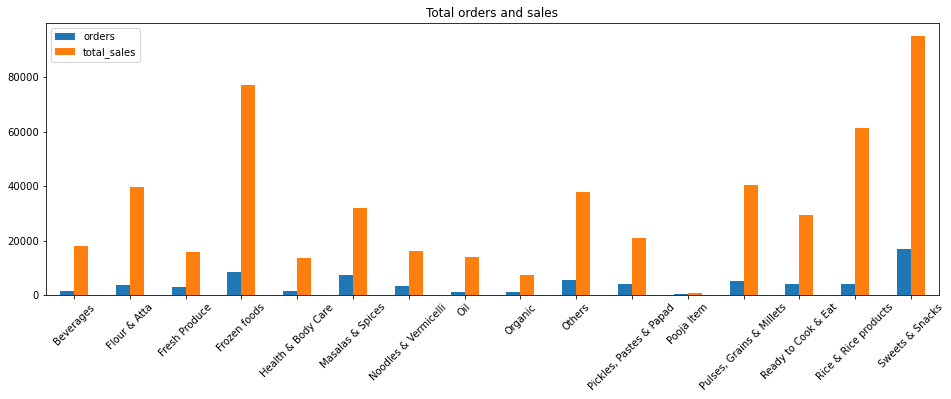

In [21]:
product_type_analysis.plot(kind='bar', figsize=(16,5));
plt.xticks(range(0,16),product_type_analysis['product_type'].values);
plt.xticks(rotation = 45)
plt.title('Total orders and sales')

In [22]:
source_of_sales=df1.pivot_table(index='api_client_title',columns='product_type',values='total_sales',aggfunc='sum')
source_of_sales

product_type,Beverages,Flour & Atta,Fresh Produce,Frozen foods,Health & Body Care,Masalas & Spices,Noodles & Vermicelli,Oil,Organic,Others,"Pickles, Pastes & Papad",Pooja Item,"Pulses, Grains & Millets",Ready to Cook & Eat,Rice & Rice products,Sweets & Snacks
api_client_title,,,,,,,,,,,,,,,,
Draft Orders,NaN,97.24,2.00,0.00,NaN,34.34,7.58,NaN,15.56,213.44,3.98,NaN,29.94,NaN,45.34,3.78
Online Store,1517.44,5838.04,4328.98,3828.76,1035.42,3091.02,1258.60,1685.34,27.00,2427.24,1846.92,98.00,4018.42,1647.34,9676.18,3898.00
Point of Sale,16373.80,33503.82,11437.56,73482.90,12496.76,28898.26,14909.50,12195.24,7251.12,35254.24,19203.86,681.94,36425.38,27643.82,51731.84,91187.10
Shopify Mobile for Android,NaN,87.12,2.98,7.98,NaN,NaN,5.98,26.36,0.00,9.98,NaN,NaN,3.70,NaN,NaN,83.86


Text(0.5, 1.0, 'source_of_sales')

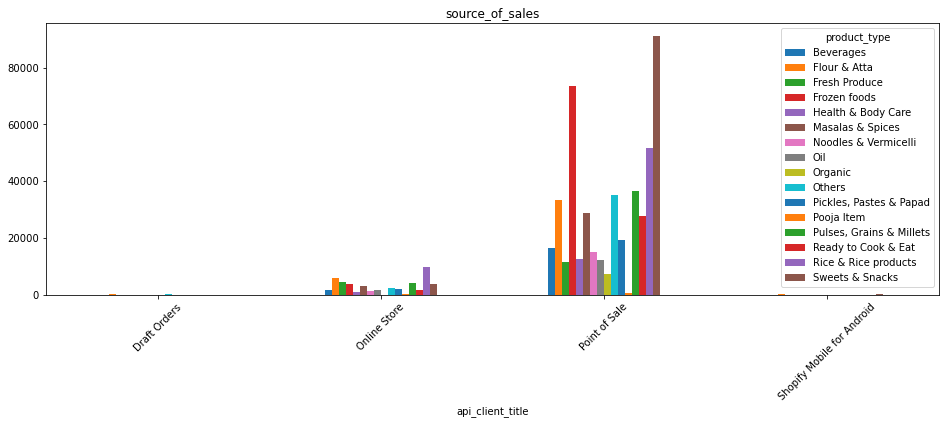

In [23]:
source_of_sales.plot(kind='bar', figsize=(16,5));
plt.xticks(rotation = 45)
plt.title('source_of_sales')

In [24]:
mean_of_sales=df1.pivot_table(index='api_client_title',columns='product_type',values='total_sales',aggfunc='mean')
mean_of_sales

product_type,Beverages,Flour & Atta,Fresh Produce,Frozen foods,Health & Body Care,Masalas & Spices,Noodles & Vermicelli,Oil,Organic,Others,"Pickles, Pastes & Papad",Pooja Item,"Pulses, Grains & Millets",Ready to Cook & Eat,Rice & Rice products,Sweets & Snacks
api_client_title,,,,,,,,,,,,,,,,
Draft Orders,NaN,16.206667,2.000000,0.000000,NaN,17.170000,7.580000,NaN,7.780000,53.360000,3.980000,NaN,9.980000,NaN,15.113333,1.260000
Online Store,14.876863,15.322940,5.913907,9.548030,10.151176,4.740828,6.730481,15.605000,4.500000,8.731079,5.116122,2.969697,7.742620,7.733991,19.992107,5.951145
Point of Sale,12.832132,10.463404,5.117477,9.206076,9.029451,4.339730,5.021724,12.624472,6.150229,6.805838,5.061639,3.294396,7.727064,7.613280,14.572349,5.644862
Shopify Mobile for Android,NaN,87.120000,1.490000,1.995000,NaN,NaN,5.980000,13.180000,0.000000,9.980000,NaN,NaN,3.700000,NaN,NaN,83.860000


Text(0.5, 1.0, 'source_of_sales')

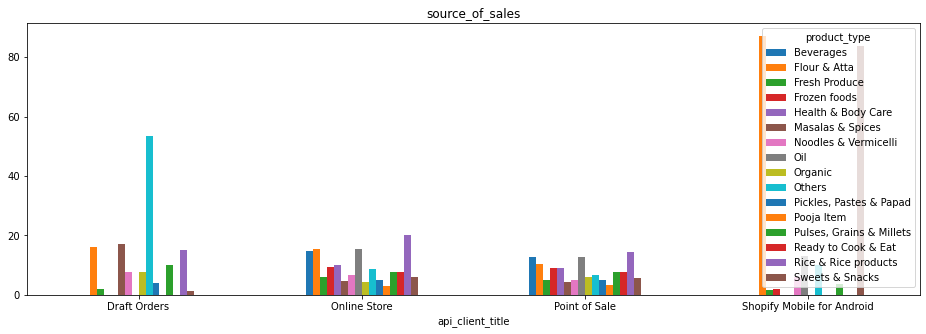

In [25]:
mean_of_sales.plot(kind='bar', figsize=(16,5));
plt.xticks(rotation = 0)
plt.title('source_of_sales')

In [26]:
df1['hour']=pd.to_datetime(df1['hour'])

In [27]:
df1['hour'].max()

Timestamp('2022-12-05 19:00:00')

In [28]:
df1['hour'].min()

Timestamp('2021-01-06 14:00:00')

In [29]:
df1['year']=pd.to_datetime(df1['hour']).dt.year
df1['day']=pd.to_datetime(df1['hour']).dt.day
df1['month']=pd.to_datetime(df1['hour']).dt.month
df1['weekday']=pd.to_datetime(df1['hour']).dt.weekday
df1['time']=pd.to_datetime(df1['hour']).dt.hour

In [30]:
df1.head()

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity,order_name,product_type,product_title,product_vendor,variant_title,api_client_title,year,day,month,weekday,time
11,2021-05-23 11:00:00,3.824510e+12,5.268530e+12,5.931930e+12,0.99,3.705210e+13,1,1.82,-0.18,0.0,1.64,0.0,0.14,1.78,1,1,0,#1078,Masalas & Spices,Everest Turmeric Powder,Everest,100 g,Point of Sale,2021,23,5,6,11
12,2021-05-23 11:00:00,3.824510e+12,5.268530e+12,5.931930e+12,1.39,3.705210e+13,1,2.54,-0.24,0.0,2.30,0.0,0.20,2.50,1,1,0,#1078,Others,Tata Iodised Crystal Salt,Tata,1 kg,Point of Sale,2021,23,5,6,11
15,2021-05-23 11:00:00,3.824510e+12,5.268530e+12,5.908010e+12,10.89,3.696460e+13,1,19.96,-1.98,0.0,17.98,0.0,1.62,19.60,1,1,0,#1078,Rice & Rice products,Udhaiyam Idli Rice,Udhaiyam,5 kg,Point of Sale,2021,23,5,6,11
19,2021-05-23 11:00:00,3.824520e+12,0.000000e+00,5.931100e+12,0.39,3.704750e+13,1,1.42,-0.14,0.0,1.28,0.0,0.12,1.40,2,2,0,#1079,Sweets & Snacks,Parle Biscuits - Hide & Seek,Parle G,33 g,Point of Sale,2021,23,5,6,11
20,2021-05-23 11:00:00,3.824520e+12,0.000000e+00,5.931100e+12,1.69,3.704750e+13,1,3.08,-0.28,0.0,2.80,0.0,0.26,3.06,1,1,0,#1079,Sweets & Snacks,Parle Biscuits - Monaco,Parle G,200 g,Point of Sale,2021,23,5,6,11


In [31]:
yearly_sales=df1.groupby('year')['total_sales'].sum()
yearly_sales

year
2021    271081.88
2022    248499.12
Name: total_sales, dtype: float64

array([<AxesSubplot:ylabel='total_sales'>], dtype=object)

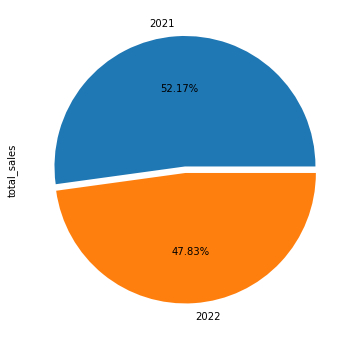

In [32]:
yearly_sales.plot(kind='pie',subplots=True,figsize=(10,6),autopct="%1.2f%%",explode=[0.025,0.025])

In [33]:
monthly_sales=df1.groupby('month')['total_sales'].sum()
monthly_sales

month
1     46221.80
2     42117.28
3     49662.56
4     48471.76
5     55177.12
6     30787.98
7     40734.04
8     37438.36
9     37035.72
10    44825.84
11    40892.54
12    46216.00
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='month'>

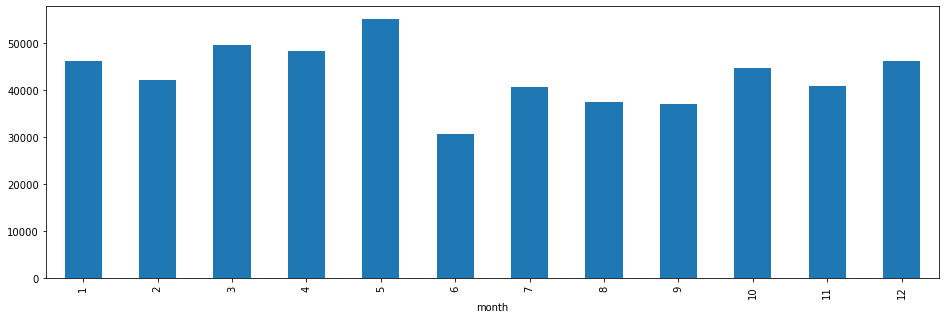

In [34]:
monthly_sales.plot(kind='bar', figsize= (16,5))

In [35]:
year_2021= df1[df1['year']== 2021]
year_2021.head()

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity,order_name,product_type,product_title,product_vendor,variant_title,api_client_title,year,day,month,weekday,time
11,2021-05-23 11:00:00,3.824510e+12,5.268530e+12,5.931930e+12,0.99,3.705210e+13,1,1.82,-0.18,0.0,1.64,0.0,0.14,1.78,1,1,0,#1078,Masalas & Spices,Everest Turmeric Powder,Everest,100 g,Point of Sale,2021,23,5,6,11
12,2021-05-23 11:00:00,3.824510e+12,5.268530e+12,5.931930e+12,1.39,3.705210e+13,1,2.54,-0.24,0.0,2.30,0.0,0.20,2.50,1,1,0,#1078,Others,Tata Iodised Crystal Salt,Tata,1 kg,Point of Sale,2021,23,5,6,11
15,2021-05-23 11:00:00,3.824510e+12,5.268530e+12,5.908010e+12,10.89,3.696460e+13,1,19.96,-1.98,0.0,17.98,0.0,1.62,19.60,1,1,0,#1078,Rice & Rice products,Udhaiyam Idli Rice,Udhaiyam,5 kg,Point of Sale,2021,23,5,6,11
19,2021-05-23 11:00:00,3.824520e+12,0.000000e+00,5.931100e+12,0.39,3.704750e+13,1,1.42,-0.14,0.0,1.28,0.0,0.12,1.40,2,2,0,#1079,Sweets & Snacks,Parle Biscuits - Hide & Seek,Parle G,33 g,Point of Sale,2021,23,5,6,11
20,2021-05-23 11:00:00,3.824520e+12,0.000000e+00,5.931100e+12,1.69,3.704750e+13,1,3.08,-0.28,0.0,2.80,0.0,0.26,3.06,1,1,0,#1079,Sweets & Snacks,Parle Biscuits - Monaco,Parle G,200 g,Point of Sale,2021,23,5,6,11


''''df = pd.pivot_table(numeric, values='ID', index='Enrollment date', aggfunc='count')
df['count'] = df['ID'].rolling(10).mean()
df['Year'] = df.index.year.astype('category')

fig, ax = plt.subplots()
fig.set_size_inches(20,6)

sns.lineplot(data=df, x='Enrollment date', y='count', ax=ax, hue='Year')
ax.set_ylabel('Average enrollments')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y - %m'))
plt.xticks(rotation=40)
plt.show()


In [36]:
df1.columns

Index(['hour', 'order_id', 'customer_id', 'product_id', 'product_price',
       'variant_id', 'orders', 'gross_sales', 'discounts', 'returns',
       'net_sales', 'shipping', 'taxes', 'total_sales',
       'ordered_item_quantity', 'net_quantity', 'returned_item_quantity',
       'order_name', 'product_type', 'product_title', 'product_vendor',
       'variant_title', 'api_client_title', 'year', 'day', 'month', 'weekday',
       'time'],
      dtype='object')

In [37]:
df1['customer_id'].value_counts()

0.000000e+00    6624
5.268980e+12     601
5.268960e+12     538
3.980040e+12     473
5.269050e+12     461
                ... 
5.314320e+12       1
5.391280e+12       1
6.188670e+12       1
5.547960e+12       1
5.483960e+12       1
Name: customer_id, Length: 1025, dtype: int64

In [38]:
df1.shape

(70337, 28)

In [39]:
df1.head()

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity,order_name,product_type,product_title,product_vendor,variant_title,api_client_title,year,day,month,weekday,time
11,2021-05-23 11:00:00,3.824510e+12,5.268530e+12,5.931930e+12,0.99,3.705210e+13,1,1.82,-0.18,0.0,1.64,0.0,0.14,1.78,1,1,0,#1078,Masalas & Spices,Everest Turmeric Powder,Everest,100 g,Point of Sale,2021,23,5,6,11
12,2021-05-23 11:00:00,3.824510e+12,5.268530e+12,5.931930e+12,1.39,3.705210e+13,1,2.54,-0.24,0.0,2.30,0.0,0.20,2.50,1,1,0,#1078,Others,Tata Iodised Crystal Salt,Tata,1 kg,Point of Sale,2021,23,5,6,11
15,2021-05-23 11:00:00,3.824510e+12,5.268530e+12,5.908010e+12,10.89,3.696460e+13,1,19.96,-1.98,0.0,17.98,0.0,1.62,19.60,1,1,0,#1078,Rice & Rice products,Udhaiyam Idli Rice,Udhaiyam,5 kg,Point of Sale,2021,23,5,6,11
19,2021-05-23 11:00:00,3.824520e+12,0.000000e+00,5.931100e+12,0.39,3.704750e+13,1,1.42,-0.14,0.0,1.28,0.0,0.12,1.40,2,2,0,#1079,Sweets & Snacks,Parle Biscuits - Hide & Seek,Parle G,33 g,Point of Sale,2021,23,5,6,11
20,2021-05-23 11:00:00,3.824520e+12,0.000000e+00,5.931100e+12,1.69,3.704750e+13,1,3.08,-0.28,0.0,2.80,0.0,0.26,3.06,1,1,0,#1079,Sweets & Snacks,Parle Biscuits - Monaco,Parle G,200 g,Point of Sale,2021,23,5,6,11


# Customer base analysis

### 1. Find out the avg orders and avg totalsales  per customers?

In [40]:
df1['hour'].nunique()

2863

In [41]:
df1.columns

Index(['hour', 'order_id', 'customer_id', 'product_id', 'product_price',
       'variant_id', 'orders', 'gross_sales', 'discounts', 'returns',
       'net_sales', 'shipping', 'taxes', 'total_sales',
       'ordered_item_quantity', 'net_quantity', 'returned_item_quantity',
       'order_name', 'product_type', 'product_title', 'product_vendor',
       'variant_title', 'api_client_title', 'year', 'day', 'month', 'weekday',
       'time'],
      dtype='object')

In [42]:
total_orders= df1.groupby('customer_id')[['orders']].sum().sort_values(by='customer_id',ascending= False).reset_index()
total_orders.head(3)

,customer_id,orders
0,6.229830e+12,5
1,6.228740e+12,3
2,6.227300e+12,1


In [43]:
total_orders['orders'].sum()

70206

In [44]:
## Top 5 customers with highest orders percentage
total_orders['avg_orders_per_customer']= total_orders['orders']/total_orders['orders'].sum()*100
total_orders.sort_values(by='avg_orders_per_customer', ascending= False).reset_index().head(5)

,index,customer_id,orders,avg_orders_per_customer
0,1024,0.000000e+00,6617,9.425120
1,988,5.268980e+12,601,0.856052
2,989,5.268960e+12,537,0.764892
3,1020,3.980040e+12,470,0.669458
4,984,5.269050e+12,461,0.656639


Top 5 customers with highest orders percentage

In [45]:
sum_of_sales= df1.groupby('customer_id')[['total_sales']].sum().sort_values(by='customer_id',ascending= False).reset_index()
sum_of_sales

,customer_id,total_sales
0,6.229830e+12,34.52
1,6.228740e+12,12.46
2,6.227300e+12,29.50
3,6.225480e+12,112.80
4,6.224930e+12,175.18
...,...,...
1020,3.980040e+12,3241.50
1021,3.978050e+12,5.56
1022,3.978020e+12,384.46
1023,3.949750e+12,94.40


In [46]:
## Top 5 customers with holding highest sales percentage
sum_of_sales['customer_sales_percent']=sum_of_sales['total_sales']/sum_of_sales['total_sales'].sum()*100
sum_of_sales.sort_values(by='customer_sales_percent', ascending= False).reset_index().head(5)

,index,customer_id,total_sales,customer_sales_percent
0,1024,0.000000e+00,41200.50,7.929562
1,988,5.268980e+12,4006.98,0.771194
2,984,5.269050e+12,3444.04,0.662849
3,871,5.283300e+12,3432.12,0.660555
4,989,5.268960e+12,3403.92,0.655128


In [47]:
customer_order_sales= pd.merge(left= sum_of_sales, right= total_orders, how= 'inner',on= 'customer_id')
customer_order_sales.head(5)

,customer_id,total_sales,customer_sales_percent,orders,avg_orders_per_customer
0,6.229830e+12,34.52,0.006644,5,0.007122
1,6.228740e+12,12.46,0.002398,3,0.004273
2,6.227300e+12,29.50,0.005678,1,0.001424
3,6.225480e+12,112.80,0.021710,16,0.022790
4,6.224930e+12,175.18,0.033716,20,0.028488


In [48]:
customer_order_sales.rename({'total_sales':'customer_total_sales', 'orders':'customer_total_orders'},axis=1,inplace=True)
customer_order_sales.head(5)

,customer_id,customer_total_sales,customer_sales_percent,customer_total_orders,avg_orders_per_customer
0,6.229830e+12,34.52,0.006644,5,0.007122
1,6.228740e+12,12.46,0.002398,3,0.004273
2,6.227300e+12,29.50,0.005678,1,0.001424
3,6.225480e+12,112.80,0.021710,16,0.022790
4,6.224930e+12,175.18,0.033716,20,0.028488


In [49]:
customer_order_sales['customer_total_sales'].describe()

count     1025.000000
mean       506.908293
std       1420.621520
min          1.880000
25%         62.160000
50%        181.580000
75%        612.420000
max      41200.500000
Name: customer_total_sales, dtype: float64

In [50]:
customer_order_sales['customer_total_orders'].describe()

count    1025.000000
mean       68.493659
std       221.764062
min         1.000000
25%         8.000000
50%        24.000000
75%        84.000000
max      6617.000000
Name: customer_total_orders, dtype: float64

### Conclusion: The average sales of 1025 customers accounts to 506.90
###  The average orders of 1025 customers accounts to 68.49 ~ 69 orders

## Top 5 customers with most number of orders

In [51]:
## Top 5 customers with most number of orders
customer_order_sales.groupby('customer_id')[['customer_total_orders']].sum().sort_values(by='customer_total_orders',ascending= False).reset_index().head(5)

,customer_id,customer_total_orders
0,0.000000e+00,6617
1,5.268980e+12,601
2,5.268960e+12,537
3,3.980040e+12,470
4,5.269050e+12,461


In [52]:
df1.columns

Index(['hour', 'order_id', 'customer_id', 'product_id', 'product_price',
       'variant_id', 'orders', 'gross_sales', 'discounts', 'returns',
       'net_sales', 'shipping', 'taxes', 'total_sales',
       'ordered_item_quantity', 'net_quantity', 'returned_item_quantity',
       'order_name', 'product_type', 'product_title', 'product_vendor',
       'variant_title', 'api_client_title', 'year', 'day', 'month', 'weekday',
       'time'],
      dtype='object')

In [53]:
df['hour'].max()

'31-12-2021 23:00'

In [54]:
customer_last_purchase= df1.groupby('customer_id').agg({'hour': lambda x: x.max()}).sort_values(by='customer_id', ascending= False).reset_index()
customer_last_purchase

,customer_id,hour
0,6.229830e+12,2022-05-26 18:00:00
1,6.228740e+12,2022-05-25 18:00:00
2,6.227300e+12,2022-05-24 13:00:00
3,6.225480e+12,2022-05-22 20:00:00
4,6.224930e+12,2022-05-26 11:00:00
...,...,...
1020,3.980040e+12,2022-12-03 13:00:00
1021,3.978050e+12,2021-10-07 20:00:00
1022,3.978020e+12,2022-08-03 18:00:00
1023,3.949750e+12,2022-09-04 19:00:00


In [55]:
customer_first_purchase_time=df1.groupby('customer_id').agg({'hour': lambda x: x.min()}).sort_values(by='customer_id', ascending= False).reset_index()
customer_first_purchase_time

,customer_id,hour
0,6.229830e+12,2022-05-26 18:00:00
1,6.228740e+12,2022-05-25 18:00:00
2,6.227300e+12,2022-05-24 13:00:00
3,6.225480e+12,2022-05-22 20:00:00
4,6.224930e+12,2022-05-22 12:00:00
...,...,...
1020,3.980040e+12,2021-01-08 16:00:00
1021,3.978050e+12,2021-10-07 20:00:00
1022,3.978020e+12,2021-02-10 11:00:00
1023,3.949750e+12,2021-01-06 20:00:00


In [56]:
customer_purchase_time= pd.merge(left=customer_first_purchase_time, right=customer_last_purchase, how= 'inner', on = 'customer_id')
customer_purchase_time.rename({'hour_x': 'first_purchase', 'hour_y': 'last_purchase'}, axis=1, inplace=True)
customer_purchase_time

,customer_id,first_purchase,last_purchase
0,6.229830e+12,2022-05-26 18:00:00,2022-05-26 18:00:00
1,6.228740e+12,2022-05-25 18:00:00,2022-05-25 18:00:00
2,6.227300e+12,2022-05-24 13:00:00,2022-05-24 13:00:00
3,6.225480e+12,2022-05-22 20:00:00,2022-05-22 20:00:00
4,6.224930e+12,2022-05-22 12:00:00,2022-05-26 11:00:00
...,...,...,...
1020,3.980040e+12,2021-01-08 16:00:00,2022-12-03 13:00:00
1021,3.978050e+12,2021-10-07 20:00:00,2021-10-07 20:00:00
1022,3.978020e+12,2021-02-10 11:00:00,2022-08-03 18:00:00
1023,3.949750e+12,2021-01-06 20:00:00,2022-09-04 19:00:00


In [57]:
sale_order_time= pd.merge(left=customer_order_sales, right=customer_purchase_time, how= 'inner', on = 'customer_id')
sale_order_time.sort_values(by= 'customer_total_orders', ascending= False).head(5)

,customer_id,customer_total_sales,customer_sales_percent,customer_total_orders,avg_orders_per_customer,first_purchase,last_purchase
1024,0.000000e+00,41200.50,7.929562,6617,9.425120,2021-01-06 15:00:00,2022-12-05 18:00:00
988,5.268980e+12,4006.98,0.771194,601,0.856052,2021-01-09 16:00:00,2022-12-04 12:00:00
989,5.268960e+12,3403.92,0.655128,537,0.764892,2021-01-10 12:00:00,2022-12-05 14:00:00
1020,3.980040e+12,3241.50,0.623868,470,0.669458,2021-01-08 16:00:00,2022-12-03 13:00:00
984,5.269050e+12,3444.04,0.662849,461,0.656639,2021-01-06 16:00:00,2022-12-02 13:00:00


In [58]:
## Number of days the customer with us
sale_order_time['customer_total_days'] = sale_order_time['last_purchase']-sale_order_time['first_purchase']
sale_order_time['customer_total_days']

0        0 days 00:00:00
1        0 days 00:00:00
2        0 days 00:00:00
3        0 days 00:00:00
4        3 days 23:00:00
              ...       
1020   693 days 21:00:00
1021     0 days 00:00:00
1022   539 days 07:00:00
1023   605 days 23:00:00
1024   698 days 03:00:00
Name: customer_total_days, Length: 1025, dtype: timedelta64[ns]

## Customer first and last purchase with total number of days

In [59]:
sale_order_time.sort_values(by= 'customer_id').head(5)

,customer_id,customer_total_sales,customer_sales_percent,customer_total_orders,avg_orders_per_customer,first_purchase,last_purchase,customer_total_days
1024,0.000000e+00,41200.50,7.929562,6617,9.425120,2021-01-06 15:00:00,2022-12-05 18:00:00,698 days 03:00:00
1023,3.949750e+12,94.40,0.018168,23,0.032761,2021-01-06 20:00:00,2022-09-04 19:00:00,605 days 23:00:00
1022,3.978020e+12,384.46,0.073994,87,0.123921,2021-02-10 11:00:00,2022-08-03 18:00:00,539 days 07:00:00
1021,3.978050e+12,5.56,0.001070,2,0.002849,2021-10-07 20:00:00,2021-10-07 20:00:00,0 days 00:00:00
1020,3.980040e+12,3241.50,0.623868,470,0.669458,2021-01-08 16:00:00,2022-12-03 13:00:00,693 days 21:00:00


## Highest purchase and least purchase

In [60]:
highest_purchase=df1.groupby('customer_id')['total_sales'].max()
highest_purchase

customer_id
0.000000e+00    146.86
3.949750e+12     31.96
3.978020e+12     16.58
3.978050e+12      3.78
3.980040e+12     39.98
                 ...  
6.224930e+12     21.90
6.225480e+12     16.98
6.227300e+12     29.50
6.228740e+12      5.58
6.229830e+12     14.78
Name: total_sales, Length: 1025, dtype: float64

In [76]:
least_purchase=df1.groupby('customer_id')['total_sales'].min()
least_purchase

customer_id
0.000000e+00   -83.86
3.949750e+12    -4.98
3.978020e+12     0.00
3.978050e+12     1.78
3.980040e+12    -7.98
                ...  
6.224930e+12     3.68
6.225480e+12     2.98
6.227300e+12    29.50
6.228740e+12     2.30
6.229830e+12     0.60
Name: total_sales, Length: 1025, dtype: float64

In [63]:
purchases= pd.merge(left=highest_purchase, right=least_purchase, how= 'inner', on= 'customer_id')
purchases.rename({'total_sales_x': 'highest_purchase', 'total_sales_y':'least_purchase'}, axis=1, inplace= True)
purchases.head().reset_index()

,customer_id,highest_purchase,least_purchase
0,0.000000e+00,146.86,-83.86
1,3.949750e+12,31.96,-4.98
2,3.978020e+12,16.58,0.00
3,3.978050e+12,3.78,1.78
4,3.980040e+12,39.98,-7.98


In [64]:
sale_order_time_purchase= pd.merge(left=sale_order_time, right=purchases, how= 'inner', on= 'customer_id')
sale_order_time_purchase.head(5)

,customer_id,customer_total_sales,customer_sales_percent,customer_total_orders,avg_orders_per_customer,first_purchase,last_purchase,customer_total_days,highest_purchase,least_purchase
0,6.229830e+12,34.52,0.006644,5,0.007122,2022-05-26 18:00:00,2022-05-26 18:00:00,0 days 00:00:00,14.78,0.60
1,6.228740e+12,12.46,0.002398,3,0.004273,2022-05-25 18:00:00,2022-05-25 18:00:00,0 days 00:00:00,5.58,2.30
2,6.227300e+12,29.50,0.005678,1,0.001424,2022-05-24 13:00:00,2022-05-24 13:00:00,0 days 00:00:00,29.50,29.50
3,6.225480e+12,112.80,0.021710,16,0.022790,2022-05-22 20:00:00,2022-05-22 20:00:00,0 days 00:00:00,16.98,2.98
4,6.224930e+12,175.18,0.033716,20,0.028488,2022-05-22 12:00:00,2022-05-26 11:00:00,3 days 23:00:00,21.90,3.68


## RFM model for analysis of frequency of customers purchase

In [175]:
snapshot_date = df1['hour'].min() + timedelta(hours=1)
print(snapshot_date)

2021-01-06 15:00:00


2022-12-05 19:00:00


In [ ]:
# --Group data by customerID--
# Create snapshot date
snapshot_date = df1['hour'].max() + timedelta(hours=1)
print(snapshot_date)
# Grouping by CustomerID
data_process = df1.groupby(['customer_id']).agg({
        'hour': lambda x: (snapshot_date - x.max()).days,
        'orders': 'count',
        'total_sales': 'sum'})

In [199]:
# --Group data by customerID--
# Create snapshot date
snapshot_date = df1['hour'].max() + timedelta(hours=1)
print(snapshot_date)
# Grouping by CustomerID
data_process = df1.groupby(['customer_id']).agg({
        'hour': lambda x: (snapshot_date - x.max()).days})

2022-12-05 20:00:00


In [200]:
data_process

,hour
customer_id,
0.000000e+00,0
3.949750e+12,92
3.978020e+12,124
3.978050e+12,424
3.980040e+12,2
...,...
6.224930e+12,193
6.225480e+12,197
6.227300e+12,195


In [196]:
data_process.sort_values(by= 'hour').reset_index()

,customer_id,hour
0,0.000000e+00,0
1,5.921550e+12,0
2,5.921420e+12,0
3,5.919650e+12,0
4,5.268960e+12,0
...,...,...
1020,5.639780e+12,663
1021,5.960050e+12,692
1022,5.441430e+12,696
1023,5.362440e+12,697


### Last purchase of customer

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['hour'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['order_id'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['total_sales'])
# Show the plot
plt.show()

In [ ]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['hour'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['order_id'], q=4, labels=f_labels)
# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values)
data_process.head()

In [ ]:
a = pd.cut(df1.year, bins=3, right=False)
a.head()

In [ ]:
pd.qcut(range(5), 4, labels=False)
array(a)

In [ ]:
df1.head(2)

In [ ]:
df1.groupby('customer_id')['variant_id'].nunique().to_frame().sort_values(by = 'variant_id', ascending= False)

In [92]:
df1['order_id'].nunique()

10149

In [93]:
df1['order_id'].value_counts()

4.472790e+12    96
4.472800e+12    87
4.472810e+12    85
4.472900e+12    78
4.472780e+12    77
                ..
4.196030e+12     1
3.983760e+12     1
4.195980e+12     1
3.983660e+12     1
4.622680e+12     1
Name: order_id, Length: 10149, dtype: int64